In [1]:
import xgboost as xgb
print(xgb.__version__)

1.3.1


In [2]:
from xgboost import plot_importance
import pandas as pd 
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

cancer=load_breast_cancer()

feature=cancer.data
target=cancer.target

df=pd.DataFrame(data=feature,columns=cancer.feature_names)
df['target']=target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
print(cancer.target_names)

['malignant' 'benign']


In [4]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [5]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=0)


In [6]:
X_train.shape

(455, 30)

In [7]:
X_test.shape

(114, 30)

In [8]:
y_train.shape

(455,)

In [9]:
dtrain=xgb.DMatrix(data=X_train, label=y_train)
dtest=xgb.DMatrix(data=X_test,label=y_test)

In [10]:
params={
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stopping':100
}

num_rounds=400

In [13]:
wlist=[(dtrain,'train'),(dtest,'eval')]

xgb_model=xgb.train(params=params,dtrain=dtrain,num_boost_round=num_rounds,evals=wlist)

[17:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.61167	eval-logloss:0.61369
[1]	train-logloss:0.54435	eval-logloss:0.54543
[2]	train-logloss:0.48615	eval-logloss:0.48902
[3]	train-logloss:0.43809	eval-logloss:0.44035
[4]	train-logloss:0.39412	eval-logloss:0.39958
[5]	train-logloss:0.35626	eval-logloss:0.36435
[6]	train-logloss:0.32515	eval-logloss:0.33274
[7]	train-logloss:0.29562	eval-logloss:0.30601
[8]	train-logloss:0.26978	eval-logloss:0.28281
[9]	train-logloss:0.24725	eval-logloss:0.26186
[10]	train-logloss:0.22772	eval-logloss:0.24381
[11]	train-logloss:0.21015	eval-logloss:0.22700
[12]	train-logloss:0.19444	eval-logloss:0.

[162]	train-logloss:0.00789	eval-logloss:0.04858
[163]	train-logloss:0.00787	eval-logloss:0.04862
[164]	train-logloss:0.00784	eval-logloss:0.04875
[165]	train-logloss:0.00780	eval-logloss:0.04841
[166]	train-logloss:0.00778	eval-logloss:0.04845
[167]	train-logloss:0.00776	eval-logloss:0.04840
[168]	train-logloss:0.00774	eval-logloss:0.04825
[169]	train-logloss:0.00772	eval-logloss:0.04827
[170]	train-logloss:0.00770	eval-logloss:0.04831
[171]	train-logloss:0.00768	eval-logloss:0.04815
[172]	train-logloss:0.00767	eval-logloss:0.04827
[173]	train-logloss:0.00762	eval-logloss:0.04839
[174]	train-logloss:0.00760	eval-logloss:0.04823
[175]	train-logloss:0.00759	eval-logloss:0.04830
[176]	train-logloss:0.00756	eval-logloss:0.04843
[177]	train-logloss:0.00754	eval-logloss:0.04845
[178]	train-logloss:0.00749	eval-logloss:0.04862
[179]	train-logloss:0.00748	eval-logloss:0.04846
[180]	train-logloss:0.00746	eval-logloss:0.04851
[181]	train-logloss:0.00745	eval-logloss:0.04847
[182]	train-logloss:

[330]	train-logloss:0.00586	eval-logloss:0.04515
[331]	train-logloss:0.00585	eval-logloss:0.04499
[332]	train-logloss:0.00585	eval-logloss:0.04505
[333]	train-logloss:0.00584	eval-logloss:0.04497
[334]	train-logloss:0.00583	eval-logloss:0.04481
[335]	train-logloss:0.00583	eval-logloss:0.04487
[336]	train-logloss:0.00582	eval-logloss:0.04491
[337]	train-logloss:0.00581	eval-logloss:0.04496
[338]	train-logloss:0.00580	eval-logloss:0.04481
[339]	train-logloss:0.00580	eval-logloss:0.04486
[340]	train-logloss:0.00579	eval-logloss:0.04485
[341]	train-logloss:0.00578	eval-logloss:0.04469
[342]	train-logloss:0.00578	eval-logloss:0.04473
[343]	train-logloss:0.00577	eval-logloss:0.04478
[344]	train-logloss:0.00576	eval-logloss:0.04471
[345]	train-logloss:0.00576	eval-logloss:0.04462
[346]	train-logloss:0.00575	eval-logloss:0.04468
[347]	train-logloss:0.00574	eval-logloss:0.04453
[348]	train-logloss:0.00574	eval-logloss:0.04458
[349]	train-logloss:0.00573	eval-logloss:0.04462
[350]	train-logloss:

In [19]:
pred_prob=xgb_model.predict(dtest)#xgboost는 예측을 1,0이 아닌 확률로 알려준다.
import numpy as np


pred=[1 if x>0.5 else 0 for x in pred_prob]

print(pred[:5])

[0, 1, 1, 1, 1]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score,roc_auc_score

In [24]:
def get_clf_evals(y_test,pred=None, pred_prob=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    recall=recall_score(y_test,pred)
    precision=precision_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred_prob)
    print("오차 행렬")
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율{2:.4f},f1스코어:{3:.4f},roc_auc:{4:.4f}'.format(accuracy,recall,precision,f1,roc_auc))

In [25]:
get_clf_evals(y_test,pred,pred_prob)

오차 행렬
[[46  1]
 [ 0 67]]
정확도:0.9912, 정밀도:1.0000, 재현율0.9853,f1스코어:0.9926,roc_auc:0.9990


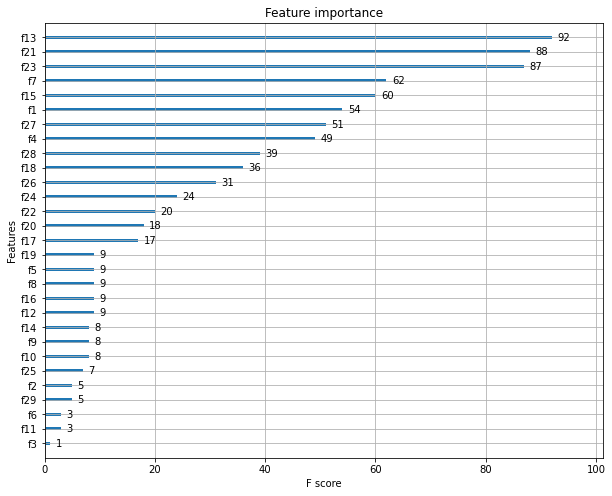

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,8))
plot_importance(xgb_model,ax=ax)

In [30]:
from xgboost import XGBClassifier

In [32]:
evals=[(X_test,y_test)]

xgb_wrapper=XGBClassifier(n_estimators=400,learning_state=0.1,max_depth=3,)
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds=400,eval_set=evals,eval_metric='logloss',verbose=True)
w_pred=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[17:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.47827
[1]	validation_0-logloss:0.35300
[2]	validation_0-logloss:0.27166
[3]	validation_0-logloss:0.21682
[4]	validation_0-logloss:0.18186
[5]	validation_0-logloss:0.15282
[6]	validation_0-logloss:0.13357
[7]	validation_0-logloss:0.12198
[8]	validation_0-logloss:0.11016
[9]	validation_0-logloss:0.10072
[10]	validation_0-logloss:0.09319
[11]	validation_0-logloss:0.08483
[12]	validation_0-logloss:0.08007
[13]	validation_0-logloss:0.07699
[14]	validation_0-logloss:0.07461
[15]	validation_0-logloss:0.07001
[16]	validation_0-logloss:0.06741
[17]	validation_0-logloss:0.06785
[18]	v

[227]	validation_0-logloss:0.04768
[228]	validation_0-logloss:0.04768
[229]	validation_0-logloss:0.04769
[230]	validation_0-logloss:0.04769
[231]	validation_0-logloss:0.04769
[232]	validation_0-logloss:0.04769
[233]	validation_0-logloss:0.04769
[234]	validation_0-logloss:0.04770
[235]	validation_0-logloss:0.04770
[236]	validation_0-logloss:0.04770
[237]	validation_0-logloss:0.04770
[238]	validation_0-logloss:0.04770
[239]	validation_0-logloss:0.04770
[240]	validation_0-logloss:0.04770
[241]	validation_0-logloss:0.04770
[242]	validation_0-logloss:0.04770
[243]	validation_0-logloss:0.04770
[244]	validation_0-logloss:0.04770
[245]	validation_0-logloss:0.04770
[246]	validation_0-logloss:0.04770
[247]	validation_0-logloss:0.04770
[248]	validation_0-logloss:0.04770
[249]	validation_0-logloss:0.04770
[250]	validation_0-logloss:0.04770
[251]	validation_0-logloss:0.04770
[252]	validation_0-logloss:0.04770
[253]	validation_0-logloss:0.04770
[254]	validation_0-logloss:0.04770
[255]	validation_0-l

In [33]:
get_clf_evals(y_test,w_pred,w_pred_proba)

오차 행렬
[[46  1]
 [ 2 65]]
정확도:0.9737, 정밀도:0.9701, 재현율0.9848,f1스코어:0.9774,roc_auc:0.9978


In [34]:
evals=[(X_test,y_test)]

xgb_wrapper=XGBClassifier(n_estimators=400,learning_state=0.1,max_depth=3,)
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds=100,eval_set=evals,eval_metric='logloss',verbose=True)
w_pred=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[17:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.47827
[1]	validation_0-logloss:0.35300
[2]	validation_0-logloss:0.27166
[3]	validation_0-logloss:0.21682
[4]	validation_0-logloss:0.18186
[5]	validation_0-logloss:0.15282
[6]	validation_0-logloss:0.13357
[7]	validation_0-logloss:0.12198
[8]	validation_0-logloss:0.11016
[9]	validation_0-logloss:0.10072
[10]	validation_0-logloss:0.09319
[11]	validation_0-logloss:0.08483
[12]	validation_0-logloss:0.08007
[13]	validation_0-logloss:0.07699
[14]	validation_0-logloss:0.07461
[15]	validation_0-logloss:0.07001
[16]	validation_0-logloss:0.06741
[17]	validation_0-logloss:0.06785
[18]	v

[227]	validation_0-logloss:0.04768
[228]	validation_0-logloss:0.04768
[229]	validation_0-logloss:0.04769
[230]	validation_0-logloss:0.04769
[231]	validation_0-logloss:0.04769
[232]	validation_0-logloss:0.04769
[233]	validation_0-logloss:0.04769
[234]	validation_0-logloss:0.04770
[235]	validation_0-logloss:0.04770
[236]	validation_0-logloss:0.04770
[237]	validation_0-logloss:0.04770
[238]	validation_0-logloss:0.04770
[239]	validation_0-logloss:0.04770
[240]	validation_0-logloss:0.04770
[241]	validation_0-logloss:0.04770
[242]	validation_0-logloss:0.04770
[243]	validation_0-logloss:0.04770
[244]	validation_0-logloss:0.04770
[245]	validation_0-logloss:0.04770
[246]	validation_0-logloss:0.04770
[247]	validation_0-logloss:0.04770
[248]	validation_0-logloss:0.04770
[249]	validation_0-logloss:0.04770
[250]	validation_0-logloss:0.04770
[251]	validation_0-logloss:0.04770
[252]	validation_0-logloss:0.04770
[253]	validation_0-logloss:0.04770
[254]	validation_0-logloss:0.04770
[255]	validation_0-l

In [35]:
get_clf_evals(y_test,w_pred,w_pred_proba)

오차 행렬
[[46  1]
 [ 2 65]]
정확도:0.9737, 정밀도:0.9701, 재현율0.9848,f1스코어:0.9774,roc_auc:0.9978


In [37]:
from xgboost import plot_importance


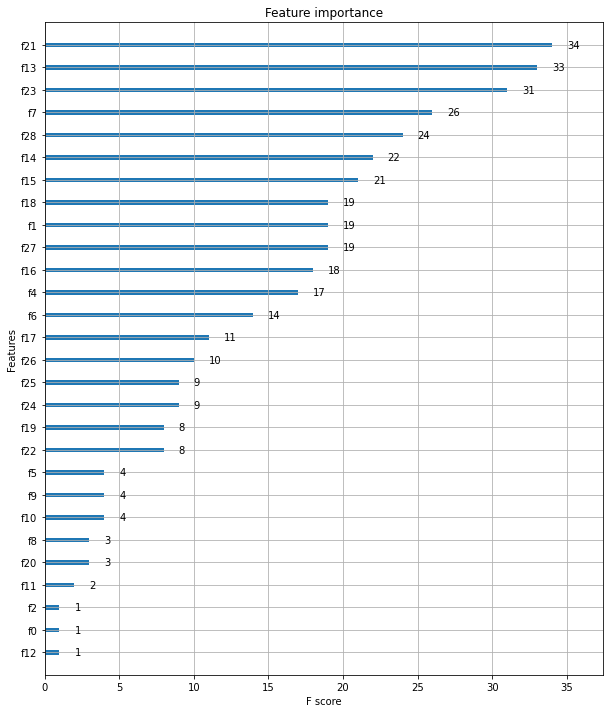

In [39]:
fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper,ax=ax)